In [9]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import AllChem

### Make the splits for task 1 (protein extrapolation)

In [11]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot['Promiscuous'] = swissprot['Sequence'].duplicated(keep=False)
swissprot

Entry   Entry Name  \
0       A0A009IHW8  ABTIR_ACIB9   
1       A0A009IHW8  ABTIR_ACIB9   
2       A0A024SC78  CUTI1_HYPJR   
3       A0A024SH76   GUX2_HYPJR   
4       A0A059TC02   CCR1_PETHY   
...            ...          ...   
173689      P36352    POLR_PHMV   
173690      P39262    VG56_BPT4   
173691      Q05115   AMDA_BORBO   
173692      Q94MV8   VG56_BPLZ5   
173693      Q9J5H2   V029_FOWPN   

                                                 Sequence EC number  Length  \
0       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...   3.2.2.-     269   
1       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...   3.2.2.6     269   
2       MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...  3.1.1.74     248   
3       MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...  3.2.1.91     471   
4       MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...  1.2.1.44     333   
...                                                   ...       ...     ...   
173689  VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...  2.7.7.48     178   
173690  MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...  3.6.1.12     171   
173691  MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...  4.1.1.76     240   
173692  MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...  3.6.1.12     172   
173693  MANVFDNSSYRDMLKMVFVIRDDLKMTKGEIVSQCCHGAISAYEKS...  3.1.1.29     124   

       clusterRes50_x clusterRes30_x clusterRes50_y clusterRes30_y  \
0          A0A009IHW8         A1AY86     A0A009IHW8         A1AY86   
1          A0A009IHW8         A1AY86     A0A009IHW8         A1AY86   
2          A0A024SC78     A0A024SC78     A0A024SC78     A0A024SC78   
3              G4MM92         G4MM92         G4MM92         G4MM92   
4              Q9S9N9         P14721         Q9S9N9         P14721   
...               ...            ...            ...            ...   
173689         P36352         P36352         P36352         P36352   
173690         Q94MV8         Q94MV8         Q94MV8         Q94MV8   
173691         Q05115         Q05115         Q05115         Q05115   
173692         Q94MV8         Q94MV8         Q94MV8         Q94MV8   
173693         Q9J5H2         Q54ZD0         Q9J5H2         Q54ZD0   

        Promiscuous  
0              True  
1              True  
2             False  
3             False  
4             False  
...             ...  
173689        False  
173690        False  
173691        False  
173692        False  
173693        False  

[173694 rows x 10 columns]

### Misclassified split from Price et al.

In [23]:
price = pd.read_csv('raw_data/price.tsv', sep='\t')
#remove sequences in price that are in swissprot
price = price[~price['Sequence'].isin(swissprot['Sequence'])]
price

Entry EC number                                           Sequence
0    WP_063460136   5.3.1.7  MAIPPYPDFRSAAFLRQHLRATMAFYDPVATDASGGQFHFFLDDGT...
1    WP_063462980  4.2.1.43  VPTTFHEDGTLDLDSQKRCLDFMIDAGVDGVCILANFSEQFSLSDA...
2    WP_063462990  1.1.1.48  LIDCNIDMTQLFAPSSSSTDATGAPQGLAKFPSLQGRAVFVTGGGS...
3    WP_041412631  4.2.1.25  MCLGRRRCHMNNKKPKTLRSASWFGSDDKNGFMYRSWMKNQGIPEH...
4    WP_011717048   5.1.3.3  MQLSVTQKSLQHAAFADELQLVTLTNSHGLEVVLSNYGASIWSVKL...
..            ...       ...                                                ...
144  WP_010207013   1.3.8.7  MADYKAPLRDMRFVLNEVFEVATTWAQLPALADTVDAETVEAILEE...
145  WP_010207016   1.3.8.7  MPDYKAPLRDIRFVRDELLGYEAHYQSLPACQDATPDMVDAILEEG...
146  WP_010207340  2.6.1.19  MSSNNPQTREWQALSSDHHLAPFSDFKQLKEKGPRIITKAHGVYLW...
147  WP_010207341  6.3.1.11  MSVPPRAVQLNEANAFLKDHPEVLYVDLLIADMNGVVRGKRIERTS...
148  WP_010213153  1.2.1.26  MSQAQRFDNYINGQWVAGADYCVNLNPSELSDVIGEYAKADVTQVN...

[148 rows x 3 columns]

### Promsicuous Split

In [30]:
promiscuous = swissprot[swissprot['Promiscuous']]
promiscuous

Entry   Entry Name  \
0       A0A009IHW8  ABTIR_ACIB9   
1       A0A009IHW8  ABTIR_ACIB9   
5       A0A061I403   FICD_CRIGR   
6       A0A061I403   FICD_CRIGR   
12      A0A072VDF2   CCR1_MEDTR   
...            ...          ...   
173182      Q9UYY9   PORC_PYRAB   
173208      Q9V0Y5   MTAD_PYRAB   
173209      Q9V0Y5   MTAD_PYRAB   
173542      Q9ZEE1   PDRP_RICPR   
173543      Q9ZEE1   PDRP_RICPR   

                                                 Sequence  EC number  Length  \
0       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...    3.2.2.-     269   
1       MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...    3.2.2.6     269   
5       MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...  2.7.7.108     455   
6       MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...    3.1.4.-     455   
12      MPAATAAAAAESSSVSGETICVTGAGGFIASWMVKLLLEKGYTVRG...    1.2.1.-     342   
...                                                   ...        ...     ...   
173182  MIEIRFHGRGGQGAVTAANILAEAAFIEGKYVQAFPFFGVERRGAP...    1.2.7.7     185   
173208  MVSLSVLLRGGLVLYGRDYKLTRADVLIEGDKIVEVKRNINKPADE...   3.5.4.28     425   
173209  MVSLSVLLRGGLVLYGRDYKLTRADVLIEGDKIVEVKRNINKPADE...   3.5.4.31     425   
173542  MTKLIIHLVSDSSVQTAKHAANSALAQFTSIKQKLYHWPMIRNCEL...  2.7.11.32     273   
173543  MTKLIIHLVSDSSVQTAKHAANSALAQFTSIKQKLYHWPMIRNCEL...   2.7.4.27     273   

       clusterRes50_x clusterRes30_x clusterRes50_y clusterRes30_y  \
0          A0A009IHW8         A1AY86     A0A009IHW8         A1AY86   
1          A0A009IHW8         A1AY86     A0A009IHW8         A1AY86   
5              Q6AY47         Q6AY47         Q6AY47         Q6AY47   
6              Q6AY47         Q6AY47         Q6AY47         Q6AY47   
12             Q9S9N9         P14721         Q9S9N9         P14721   
...               ...            ...            ...            ...   
173182         O58411         O05650         O58411         O05650   
173208         Q9V0Y5         P72156         Q9V0Y5         P72156   
173209         Q9V0Y5         P72156         Q9V0Y5         P72156   
173542         C4K0B5         Q8GVP6         C4K0B5         Q8GVP6   
173543         C4K0B5         Q8GVP6         C4K0B5         Q8GVP6   

        Promiscuous  
0              True  
1              True  
5              True  
6              True  
12             True  
...             ...  
173182         True  
173208         True  
173209         True  
173542         True  
173543         True  

[21824 rows x 10 columns]

<Axes: >

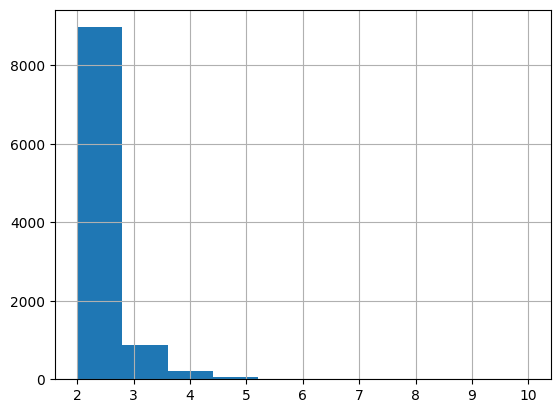

In [31]:
promiscuous['Sequence'].value_counts().hist()

In [29]:
promiscuous['EC3'] = promiscuous['EC number'].str.split('.').str[:3].str.join('.')
unique_level3 = promiscuous['EC3'].unique()

/tmp/ipykernel_593873/4183979778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promiscuous['EC3'] = promiscuous['EC number'].str.split('.').str[:3].str.join('.')


164

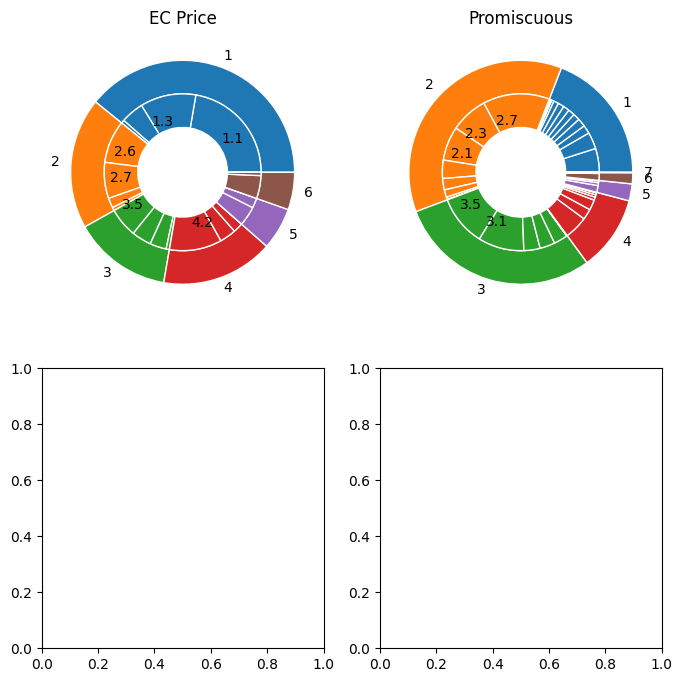

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for index, title in enumerate(['EC Price', 'Promiscuous']):

    df = pd.DataFrame()
    
    if index == 0:
        df['EC'] = price['EC number']
    elif index == 1:
        df['EC'] = promiscuous['EC number']

    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 2
    j = index % 2

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(6):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()

In [61]:
#check to make sure all EC numbers in swissprot_CLEAN are in EC2desc
#not all of them are available
swissprot_CLEAN[~swissprot_CLEAN['brenda'].isin(EC2desc.keys())]

NameError: name 'EC2desc' is not defined

### Make reaction test set

In [36]:
ec2rxns = np.load('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/full_datasets/EC2rxns_ECreact.npy', allow_pickle=True).item()

In [37]:
#filter to only the relevant ECs for now (in the future can include dashes)
unique_ECs = swissprot_CLEAN['brenda'].unique()
ec2rxns_train = {k: v for k, v in ec2rxns.items() if k in unique_ECs}

ec2react_train_reactions = []
for k in ec2rxns_train.keys():
    ec2react_train_reactions.extend(ec2rxns_train[k])

#find duplicated entreis in ec2react_train_reactions
from collections import Counter
duplicates = [item for item, count in Counter(ec2react_train_reactions).items() if count > 1]

I realized we need to filter this so that the reaction only corresponds to one EC number, otherwise it will be tough

In [38]:
#remove a reaction from every key in the dictionary, if values is longer than 1
#filter ec2rxns to keys in unique_ECs
#ec2rxns = {k: v for k, v in ec2rxns.items() if k in unique_ECs}

random.seed(42)

# ec2rxns_train = ec2rxns.copy()
ec2rxns_test_ECextrap = {}
ec2rxns_test_noECextrap = {}

#list keys with only one example
#single_example_keys = [key for key in ec2rxns_train if len(ec2rxns_train[key]) == 1]
#only take the ones not in duplicates
#randomly sample 500 if these
#single_example_keys = random.sample(single_example_keys, 500)

#shuffle single_example_keys
#random.shuffle(single_example_keys)

#remove these from train set and add to the test set
# for key in single_example_keys:
#     ec2rxns_test_ECextrap[key] = ec2rxns_train[key][0]
#     ec2rxns_train.pop(key)
train_keys = list(ec2rxns_train.keys())
random.shuffle(train_keys)

counter = 0

for key in train_keys:
    if len(ec2rxns_train[key]) > 1:
        #shuffle the order of the values
        shuffled = sorted(ec2rxns_train[key], key=lambda x: random.random())
        reaction = shuffled[-1]
        if reaction not in duplicates:
            ec2rxns_test_noECextrap[key] = reaction
            ec2rxns_train[key] = shuffled[:-1]
    else:
        reaction = ec2rxns_train[key][0]
        if reaction not in duplicates and counter < 1000:
            ec2rxns_test_ECextrap[key] = reaction
            ec2rxns_train.pop(key)
            counter += 1

#ec2rxns_train = {k: v for k, v in ec2rxns_train.items() if k in unique_ECs}

#unique_ECs = uniprot['brenda'].unique() #don't filter the keys for now
#ec2rxns_test = {k: v for k, v in ec2rxns_test_noECextrap.items() if k in unique_ECs}

In [39]:
len(ec2rxns_train.keys())

3154

In [42]:
#find the total length of the values
total_length = 0
for key in ec2rxns_train.keys():
    total_length += len(ec2rxns_train[key])
total_length

44150

In [43]:
ec2react_train_reactions = []
for k in ec2rxns_train.keys():
    ec2react_train_reactions.extend(ec2rxns_train[k])

#get the unique values
unique_reactions = set(ec2react_train_reactions)
len(unique_reactions)

39840

In [46]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/EC2rxns_train.npy', ec2rxns_train)

In [40]:
len(ec2rxns_test_ECextrap.keys())

514

In [41]:
len(ec2rxns_test_noECextrap.keys())

2319

In [47]:
test_ECextrap_df = pd.DataFrame(list(ec2rxns_test_ECextrap.items()), columns=['brenda', 'reaction_smiles'])
test_ECextrap_df

brenda                                    reaction_smiles
0     2.3.1.188  COc1cc(/C=C/C(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)...
1    1.13.11.43  COc1cc(C=Cc2ccc(O)c(OC)c2)ccc1O.O=O>>COc1cc(C=...
2     2.4.1.342  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3       2.5.1.6  C[Se]CCC(N)C(=O)O.Nc1ncnc2c1ncn2[C@@H]1O[C@H](...
4      5.3.1.31  O=S(=O)([O-])C[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@...
..          ...                                                ...
509   2.3.1.270  *C(O)CC(=O)NC(CCCN)C(=O)O.*CCC(=O)S*>>*C(=O)OC...
510    4.2.1.31       O.O=C([O-])/C=C\C(=O)[O-]>>O=C(O)CC(O)C(=O)O
511    2.7.1.92  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
512   1.12.98.2  CC1Nc2nc(N)[nH]c(=O)c2N2CN(c3ccc(CC(O)C(O)C(O)...
513  1.14.11.62  CC(C)(COP(=O)([O-])OP(=O)([O-])OC[C@H]1O[C@@H]...

[514 rows x 2 columns]

In [48]:
test_ECextrap_df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/rxn2ec_hard_test.csv', index=False)

In [49]:
test_noECextrap_df = pd.DataFrame(list(ec2rxns_test_noECextrap.items()), columns=['brenda', 'reaction_smiles'])
test_noECextrap_df

brenda                                    reaction_smiles
0         3.5.3.8  NC=NC(CCC(=O)O)C(=O)O.O>>N[C@@H](CCC(=O)[O-])C...
1        3.2.1.54  C[C@H]1C2O[C@@H]3[C@@H](CO)O[C@H](O[C@@H]4[C@@...
2      1.14.11.13  C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12C[C@H](O)C[C@...
3       4.1.99.12  O=C(CO)[C@H](O)[C@H](O)COP(=O)([O-])[O-]>>CC(=...
4        3.2.1.22  *O[C@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O.O>>O...
...           ...                                                ...
2314     4.1.2.58  O=C([O-])C(=O)CC(O)C(O)CS(=O)(=O)[O-]>>O=CC(O)...
2315   1.14.14.65  CC(C)c1cc2c(cc1O)[C@@]1(C)CCCC(C)(C)[C@@H]1CC2...
2316     1.3.8.14  *N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...
2317    1.5.99.15  C[C@@H]1Nc2nc(N)[nH]c(=O)c2N=C1[C@@H](C)Nc1ccc...
2318  1.14.13.180  CCC1(O)CC(O)c2c(cc3c(c2O)C(=O)c2c(O)cccc2C3=O)...

[2319 rows x 2 columns]

In [50]:
test_noECextrap_df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/rxn2ec_medium_test.csv', index=False)

In [51]:
train_df = pd.DataFrame(list(ec2rxns_train.items()), columns=['brenda', 'reaction_smiles'])
np.random.seed(42)
random.seed(42)
train_df['reaction_smiles'] = train_df['reaction_smiles'].apply(lambda x: random.choice(x))
#take the ones that are not in duplicates
train_df = train_df[~train_df['reaction_smiles'].isin(duplicates)]
train_df

brenda                                    reaction_smiles
0       1.1.1.1  C/C=C/C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...
1      1.1.1.10  NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...
2     1.1.1.100  *SC(=O)C[C@@H](*)O.NC(=O)c1ccc[n+]([C@@H]2O[C@...
3     1.1.1.101  CCCCCCCC/C=C\CCCCCCCC(=O)OCC(=O)COP(=O)([O-])[...
4     1.1.1.102  CCCCCCCCCCCCCCC[C@H](O)[C@@H](N)CO.NC(=O)c1ccc...
...         ...                                                ...
3148    7.5.2.8  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3149    7.5.2.9  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3150   7.6.2.10  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...
3151    7.6.2.5  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...
3152    7.6.2.8  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...

[2233 rows x 2 columns]

In [52]:
train_df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/rxn2ec_easy_test.csv', index=False)

### Data augmentation by changing the order

In [5]:
ec2rxns = np.load('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/EC2rxns_train.npy', allow_pickle=True).item()
ec2rxns

{'1.1.1.1': ['NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O-])OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1.O=C(CO)c1c[nH]c2ccccc12>>O=CC(=O)c1c[nH]c2ccccc12',
  'CCCC(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](OP(=O)(O)O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.[H+]>>CCCC(C)O',
  'CC[C@H](C)O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)c1>>CCC(C)=O',
  'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.O=C(c1ccccc1)C(F)(F)F>>OC(c1ccccc1)C(F)(F)F',
  'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](OP(=O)(O)O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.O=C(c1ccccc1)C(F)(F)F.[H+]>>OC(c1ccccc1)C(F)(F)F',
  'CC(=O)C(C)O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1.[H+]>>CC(O)C(C)O',
  'NC(

In [33]:
#get the sum of lengths of the values
sum([len(v) for v in ec2rxns_train.values()])

43413

In [34]:
ec2rxns
#within each key, check if there are duplicate reactions (there are not)
for key in ec2rxns:
    if len(ec2rxns[key]) != len(set(ec2rxns[key])):
        print(key)

In [70]:
np.random.seed(42)
random.seed(42)
not_promiscuous = swissprot_CLEAN_withcluster[~swissprot_CLEAN_withcluster['promiscuous']]
easy_sequences = not_promiscuous.groupby('brenda', as_index=False).apply(lambda x: x.sample(1))
easy_sequences

id     brenda  \
0    113877  Q0DWH1    1.1.1.1   
1    15081   Q91XV4   1.1.1.10   
2    31511   P0A2C9  1.1.1.100   
3    40314   Q09851  1.1.1.101   
4    125422  Q6GV12  1.1.1.102   
...             ...        ...   
2999 84827   Q6BEX0    7.5.2.9   
3000 99756   Q1M589   7.6.2.10   
3001 44546   Q57I19    7.6.2.5   
3002 113586  A5F1V0    7.6.2.8   
3003 70567   Q9KIF7    7.6.2.9   

                                                      sequence  \
0    113877  MASSTQGQVITCKAAVAWEANRPMTIEDVQVAPPQAGEVRVKILFT...   
1    15081   MDLGLAGRRALVTGAGKGIGRSTVLALQAAGAHVVAVSRTQADLDS...   
2    31511   MSFEGKIALVTGASRGIGRAIAETLVARGAKVIGTATSENGAKNIS...   
3    40314   MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...   
4    125422  MLLLAAAGLVAFVLLLYMVSPLISPKPLALPGAHVVVTGGSSGIGK...   
...                                                        ...   
2999 84827   MTTDQHQEILRTEGLSKFFPGVKALDNVDFSLRRGEIMALLGENGA...   
3000 99756   MATINIIDVKKNYGAVPAVKGINLSVADGELIVLVGPSGCGKSTLL...   
3001 44546   MLEARDLYCERDERTLFRGLSFTVDAGEWVQVTGGNGAGKTTLLRL...   
3002 113586  MIRVNSLQVDSRLLPLSLQANAGEVWHVIGPNGCGKSTLLAALAGM...   
3003 70567   MPVKIKIEHLTKIFGKRIKTALTMVEKGEPKNEILKKTGATVGVYD...   

                                                          name  promiscuous  \
0    113877                      Alcohol dehydrogenase class-3        False   
1    15081                                L-xylulose reductase        False   
2    31511     3-oxoacyl-[acyl-carrier-protein] reductase FabG        False   
3    40314   NADPH-dependent 1-acyldihydroxyacetone phospha...        False   
4    125422                 3-ketodihydrosphingosine reductase        False   
...                                                        ...          ...   
2999 84827   Galactofuranose transporter ATP-binding protei...        False   
3000 99756   sn-glycerol-3-phosphate import ATP-binding pro...        False   
3001 44546   Putative bifunctional cytochrome c-type biogen...        False   
3002 113586        Vitamin B12 import ATP-binding protein BtuD        False   
3003 70567   Glycine betaine transport ATP-binding protein ...        False   

            cluster30 cluster50 cluster70 cluster90  
0    113877    A1L4Y2    A1L4Y2    P93629    P93629  
1    15081     I6Y778    Q8JIS3    Q8JIS3    Q91XV4  
2    31511     I6Y778    O67610    P0AEK2    P0AEK2  
3    40314     Q09851    Q09851    Q09851    Q09851  
4    125422    Q06136    Q06136    Q06136    Q06136  
...               ...       ...       ...       ...  
2999 84827     Q1BQ82    P63299    P63299    P63299  
3000 99756     Q8UII7    A1SWH9    Q2K1C8    Q1M589  
3001 44546     Q57I19    Q57I19    Q57I19    Q57I19  
3002 113586    B0R5G4    Q87Q38    C3LLU1    C3LLU1  
3003 70567     P46920    P46920    Q9KIF7    Q9KIF7  

[3004 rows x 9 columns]

In [71]:
easy_sequences[['brenda', 'sequence']].to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/protein2ec_easy_test.csv', index=False)

In [74]:
#return rows where cluster30 value counts = 1
far_sequence_index = not_promiscuous[not_promiscuous['cluster30'].map(swissprot_CLEAN_withcluster['cluster30'].value_counts()) == 1].index
#most also have multiple brendas present
multiple_brenda_index = not_promiscuous[not_promiscuous['brenda'].map(swissprot_CLEAN_withcluster['brenda'].value_counts()) > 1].index
intersection_indices = far_sequence_index.intersection(multiple_brenda_index)

In [75]:
sequence_test = not_promiscuous.loc[intersection_indices]
np.random.seed(42)
random.seed(42)
#sample a random one from each brenda
sequence_test = sequence_test.groupby('brenda').sample(1)
sequence_test.sort_values(by='brenda')
test_indices = sequence_test.index
#drop sequence_test
swissprot_CLEAN_withcluster_train = swissprot_CLEAN_withcluster.drop(test_indices)
sequence_test

id     brenda                                           sequence  \
14502   N4WE43    1.1.1.1  MWKIESFLLSKLFLCIALCTAYVAFSSAMMEPGLWLLSRPIVPLNR...   
47979   P27583  1.1.1.100  VYEQVSIEVPQSVEAPVVIITGASEIEASTIQALSFGPDVXKEADV...   
57982   Q556J2  1.1.1.102  MIIYILFSLLAAVIVHLVYKKQTGFKLKGKHIVVVGGSSGIGKELV...   
37431   Q987N5  1.1.1.169  MKITIFGAGAIGGYLAAKLAIAGRTDLSIVARGAHLEAIQANGLRL...   
16799   Q5E1G4   1.1.1.17  MTQTTAAVICGEKDIQLRTFELPSISADELLVKNISNSVCLSTYKA...   
...        ...        ...                                                ...   
117051  P46904    7.2.2.4  MLSHIYKKEMIDALRDRKTILLTILVPMIMMLGLVFFYESMLSDKG...   
31663   Q9ZAA8    7.2.4.5  MTDNPWLIMMINMTIVFGVLIVLGILMVLIHAVDPTKKVQGKKKPV...   
72953   O31427    7.3.2.3  MQLMQVQNLSKCYRNGDGVEHLSFSIQRGEIVALLGPNGAGKTTTI...   
76537   P96313    7.4.2.8  KLAGMTGTAKTEEEEFRNIYGMDVMVIPTNKPIARIDKPDLIYKTM...   
41430   O21280    7.6.2.5  MNLTKIQNLTIHNITGIRSNKIIFQNINFSLEKGSLFIIQGSNGSG...   

                                                     name  promiscuous  \
14502                                  Dehydrogenase RED2        False   
47979          3-oxoacyl-[acyl-carrier-protein] reductase        False   
57982                  3-ketodihydrosphingosine reductase        False   
37431                       2-dehydropantoate 2-reductase        False   
16799                Mannitol-1-phosphate 5-dehydrogenase        False   
...                                                   ...          ...   
117051              ABC transporter permease protein NatB        False   
31663          Glutaconyl-CoA decarboxylase subunit delta        False   
72953        SkfA peptide export ATP-binding protein SkfE        False   
76537                    Protein translocase subunit SecA        False   
41430   Cytochrome c biogenesis ATP-binding export pro...        False   

       cluster30 cluster50 cluster70 cluster90  
14502     N4WE43    N4WE43    N4WE43    N4WE43  
47979     P27583    P27583    P27583    P27583  
57982     Q556J2    Q556J2    Q556J2    Q556J2  
37431     Q987N5    Q987N5    Q987N5    Q987N5  
16799     Q5E1G4    Q5E1G4    Q5E1G4    Q5E1G4  
...          ...       ...       ...       ...  
117051    P46904    P46904    P46904    P46904  
31663     Q56724    Q9ZAA8    Q9ZAA8    Q9ZAA8  
72953     Q2IN45    O31427    O31427    O31427  
76537     P96313    P96313    P96313    P96313  
41430     O21280    O21280    O21280    O21280  

[590 rows x 9 columns]

In [76]:
sequence_test[['brenda','sequence']].to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_240423/protein2ec_hard_test.csv', index=False)

In [77]:
swissprot_CLEAN_withcluster_train

id     brenda                                           sequence  \
0       P51451   2.7.10.2  MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...   
1       C7C422    3.5.2.6  MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...   
2       P00917    4.2.1.1  MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...   
3       Q9ULX7    4.2.1.1  MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...   
4       P10506   2.7.12.2  MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...   
...        ...        ...                                                ...   
141316  A5WA74   3.1.3.11  MSRVTLSRYLIEQTRSNNTPADLRFLIEVVARACKEISHHVSKGAL...   
141318  A9GEI9   4.2.1.59  MPERTQAPVTLDIHQILSILPHRYPLVMVDRVTEITANKCIRGYKC...   
141319  Q9KQH9  2.3.1.179  MSKRRVVVTGMGMLSPVGNTVESSWKALLAGQSGIVNIEHFDTTNF...   
141320  Q11WK3    6.3.5.2  MTEKILILDFGSQYTQLIARRVRELNVYCEIHPYNKAPQIDGTVKG...   
141321  B1KNT2   4.2.1.59  MSEQLNTMDIKEIMSFLPHRYPFLLIDRVLDYTPGETLHAIKNVTI...   

                                                     name  promiscuous  \
0                             Tyrosine-protein kinase Blk        False   
1                           Metallo-beta-lactamase type 2        False   
2                                    Carbonic anhydrase 1        False   
3                                   Carbonic anhydrase 14        False   
4                                     Protein kinase byr1        False   
...                                                   ...          ...   
141316                Fructose-1,6-bisphosphatase class 1        False   
141318  3-hydroxyacyl-[acyl-carrier-protein] dehydrata...        False   
141319        3-oxoacyl-[acyl-carrier-protein] synthase 2        False   
141320               GMP synthase [glutamine-hydrolyzing]        False   
141321  3-hydroxyacyl-[acyl-carrier-protein] dehydrata...        False   

       cluster30 cluster50 cluster70 cluster90  
0         Q922K9    Q922K9    P51451    P51451  
1         C7C422    C7C422    C7C422    C7C422  
2         Q9Y2D0    Q9Y2D0    Q8HY33    P00917  
3         Q16790    Q9ULX7    Q9ULX7    Q9ULX7  
4         Q07192    P10506    P10506    P10506  
...          ...       ...       ...       ...  
141316    P25851    Q13QU8    B1XZ11    C1DHU3  
141318    Q8KBX0    A9GEI9    A9GEI9    A9GEI9  
141319    P52410    P73283    P55338    P55338  
141320    B1ZNB4    A6H0T6    Q11WK3    Q11WK3  
141321    Q8ZH57    Q8ZH57    B8E7Q5    B0TP72  

[129103 rows x 9 columns]

In [79]:
swissprot_CLEAN_withcluster_train['brenda'].nunique()

3154

In [80]:
ec2clusterid_train = swissprot_CLEAN_withcluster_train.groupby('brenda')['cluster70'].apply(list).to_frame().to_dict()['cluster70']
ec2clusterid_train

{'1.1.1.1': ['N4WE73',
  'P32771',
  'P23991',
  'P23991',
  'P28484',
  'P28484',
  'P28484',
  'P50381',
  'P41795',
  'P44557',
  'P44557',
  'A5JYX5',
  'P23991',
  'P25141',
  'P25141',
  'P07246',
  'P37686',
  'P54202',
  'P28484',
  'P28484',
  'P07246',
  'P07246',
  'P07246',
  'P25141',
  'P07246',
  'Q17335',
  'P28484',
  'P28484',
  'P14940',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'Q8CQ56',
  'Q4J781',
  'P44557',
  'P44557',
  'P44557',
  'P44557',
  'P44557',
  'P44557',
  'N4WW42',
  'E1ACQ9',
  'O07737',
  'P33010',
  'P25141',
  'Q9NAR7',
  'P28484',
  'P86883',
  'P07246',
  'P25141',
  'Q9P6C8',
  'P25141',
  'P25141',
  'P28484',
  'P25141',
  'P25141',
  'P10127',
  'P07246',
  'Q5XI95',
  'P40394',
  'P9WQC0',
  'O31186',
  'P9WQC7',
  'P80175',
  'Q17335',
  'P72324',
  'A1L4Y2',
  'P93629',
  'P81431',
  'P81431',
  'P81431',
  'Q17335',
  'P28484',
  'P28484',
  'P28484',
  'P28484',
  'Q5AR48',
  'P23991',
  'P40394',
  'P4

In [81]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/EC2cluster70id_train.npy', ec2clusterid_train)

In [89]:
clusterid2proteinseq_train = swissprot_CLEAN_withcluster_train.groupby('cluster70')['sequence'].apply(list).to_frame().to_dict()['sequence']
clusterid2proteinseq_train

{'A0A009IHW8': ['MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 'A0A023GS29': ['MAPTKDSVIHMGAESWDEISEFVTKKGHGVKGLSELGIKTLPKQFHQPLEERFSEKKILERASIPLIDMSKWDSPEVVKSICDAAEHWGFFQIVNHGVPLETLQRVKEATHRFFALPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSEEETNTYWPPICRDEMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRINLNYYPKCPNPELTLGVGRHSDISTFTILLQDEIGGLHVRKLDDTGNTWVHVTPISGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKPQAILCPFPEVLANGEKPVYKPVLCSDYSRHFYTKPHDGKKTVDFALMN',
  'MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPFHQPLEERFSEKKILERASIPLIDMSEWDSPEVVKSICDAAENWGFFQIVNHGVPLETLERVKEATHRFFGLPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSXEETNTYWPPICXDQMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRVNLNYYPKCPNRELTLGVGRHSDISTFTILLQDQIEVLHVRKLDDTGNTWVHVTPIAGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKP

In [90]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/cluster70id2proteinseq_train.npy', clusterid2proteinseq_train)

In [87]:
#covnert promiscous columne to 1 and 0
swissprot_CLEAN_withcluster_train['promiscuous'] = swissprot_CLEAN_withcluster_train['promiscuous'].astype(int)
clusterid2promiscuous_train = swissprot_CLEAN_withcluster_train.groupby('cluster70')['promiscuous'].apply(list).to_frame().to_dict()['promiscuous']
clusterid2promiscuous_train

{'A0A009IHW8': [0],
 'A0A023GS29': [0, 0, 0],
 'A0A024RBG1': [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 'A0A024SMV2': [0],
 'A0A060LAL9': [0, 0],
 'A0A061FDP1': [0, 0],
 'A0A061FKL9': [0, 0, 0, 0],
 'A0A061FMF5': [0],
 'A0A067XGX8': [0, 0, 0, 0],
 'A0A067YB04': [0],
 'A0A067YBQ3': [0],
 'A0A072UR65': [0],
 'A0A072VEP0': [0],
 'A0A077K8G3': [0, 0],
 'A0A077LPS9': [0],
 'A0A087WNH6': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'A0A096P8D3': [0],
 'A0A096VHY7': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'A0A096XJN4': [0],
 'A0A096ZEC9': [0],
 'A0A0A1GNF2': [0],
 'A0A0A1H7M6': [0, 0, 0, 0, 0],
 'A0A0A1H7N4': [0, 0],
 'A0A0A1H8I4': [0],
 'A0A0A2IDH4': [0],
 'A0A0A2JWD0': [0],
 'A0A0A6ZFR4': [0],
 'A0A0A6ZFY4': [0],
 'A0A0A7GEY4': [0, 1, 1],
 'A0A0B0QJN8': [0],
 'A0A0B4G504': [0],
 'A0A0B4IF96': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 'A0A0B4ZTQ2': [0],
 'A0A0B5A051': [0, 0],
 'A0A0C5PRW9': [0, 0],
 'A0A0C5Q309': [0, 0],
 'A0A0D2L718': [0],
 'A0A0D3MJQ5': [0],
 'A0A0D3QS97': [0],
 

In [88]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/train_240423/cluster70id2promiscuous_train.npy', clusterid2promiscuous_train)

### Alternatively, in the past, I saved the promiscuous and non promiscuous sequences separately,but this is a weird way of doing it

In [75]:
clusterid2proteinseq_promiscuous_train = swissprot_CLEAN_withcluster_train[swissprot_CLEAN_withcluster_train['promiscuous'] == True].groupby('cluster70')['sequence'].apply(list).to_frame().to_dict()['sequence']
clusterid2proteinseq_promiscuous_train

{'A0A024RBG1': ['MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPGGAAVREVFEEAGVKGKLGRLLGNFEQNQDRKHRTYVYVLTVTEILEDWEDSVSIGRKREWFKVEDAIKVLQCHKPVHAEYLQKLKLGGSPTNGNSVAPSPPEGDP',
  'MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPDGAAVREVYEEAGVKGKLGRLLGVFEQNQDRKHRTYVFVLTVTELLEDWEDSVSIGRKREWFKIEDAIKVLQCHKPVHAEYLEKLKLGGSPTNGNSAAPSPPESEP',
  'MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPGGAAVREVYEEAGVKGKLGRLLGVFEQNQDRKHRTYVYVLTVTELLEDWEDSVSIGRKREWFKVEDAIKVLQCHKPVHAEYLEKLKLGGSPTNGNSMAPSSPDSDP',
  'MKCKPNQTRTYDPEGFKKRAACLCFRSEREDEVLLVSSSRYPDRWIVPGGGMEPEEEPGGAAVREVYEEAGVKGKLGRLLGVFEQNQDPKHRTYVYVLTVTELLEDWEDSVSIGRKREWFKVEDAIKVLQCHKPVHAEYLEKLKLGGSPTNGNSMAPSSPDSDP'],
 'A0A0A7GEY4': ['MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRPVITLLSAEALGEDYRKAIHAAIAIETVHNFTLVHDDIMDEDEMRRGVKTVHTLFGIPTAILAGDTLYAEAFEILSMSDAPPENIVRAVSKLARVCVEICEGQFMDMSFEERDSVGESEYLEMVRKKTGVLIGISASIPAVLFGKDESVEKALWNYGIYSGIGFQIHDDLLDISGKGKIGKDWGSDILEGKKTLIVIKAFEEGIELETFGKGRASEEELERDIKKLFDCGAVDYARERAREYI

In [221]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/cluster70id2proteinseq_train.npy', clusterid2proteinseq_promiscuous_train)

In [76]:
len(clusterid2proteinseq_promiscuous_train.keys())

2649

In [225]:
# clusterid2proteinseq_train = swissprot_CLEAN_withcluster_train.groupby('cluster70')[['sequence' , 'promiscuous']].apply(list).to_frame().to_dict()[['sequence', 'promiscuous']]
# clusterid2proteinseq_train

In [77]:
clusterid2proteinseq_notpromiscuous_train = swissprot_CLEAN_withcluster_train[swissprot_CLEAN_withcluster_train['promiscuous'] == False].groupby('cluster70')['sequence'].apply(list).to_frame().to_dict()['sequence']
clusterid2proteinseq_notpromiscuous_train

{'A0A009IHW8': ['MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR'],
 'A0A023GS29': ['MAPTKDSVIHMGAESWDEISEFVTKKGHGVKGLSELGIKTLPKQFHQPLEERFSEKKILERASIPLIDMSKWDSPEVVKSICDAAEHWGFFQIVNHGVPLETLQRVKEATHRFFALPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSEEETNTYWPPICRDEMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRINLNYYPKCPNPELTLGVGRHSDISTFTILLQDEIGGLHVRKLDDTGNTWVHVTPISGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKPQAILCPFPEVLANGEKPVYKPVLCSDYSRHFYTKPHDGKKTVDFALMN',
  'MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPFHQPLEERFSEKKILERASIPLIDMSEWDSPEVVKSICDAAENWGFFQIVNHGVPLETLERVKEATHRFFGLPAEEKNKYSKENSPINNVRFGSSFVPHVEKALEWKDFLSMFYVSXEETNTYWPPICXDQMLEYMRSSEVLIKRLMEVLVVKGLKVKQIDEIREPMLVGSRRVNLNYYPKCPNRELTLGVGRHSDISTFTILLQDQIEVLHVRKLDDTGNTWVHVTPIAGSLIINIGDALQIMSNGRYKSIEHMVVANGTQDRISVPLFVNPKP

In [222]:
np.save('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/cluster70id2proteinseq_notpromiscuous_train.npy', clusterid2proteinseq_notpromiscuous_train)

In [80]:
len(clusterid2proteinseq_notpromiscuous_train.keys())

47489

<Axes: >

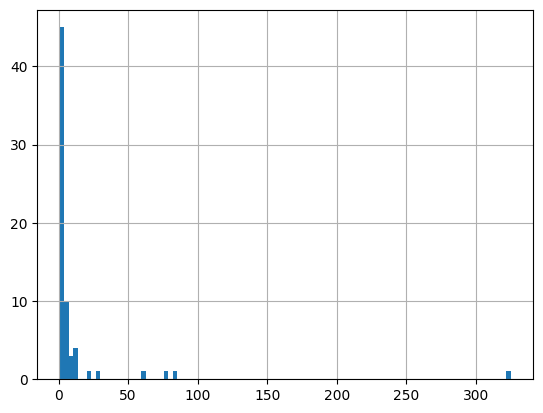

In [79]:
swissprot_CLEAN_withcluster_train[swissprot_CLEAN_withcluster_train['brenda'] == '4.2.1.20']['cluster50'].value_counts().hist(bins=100)

<Axes: >

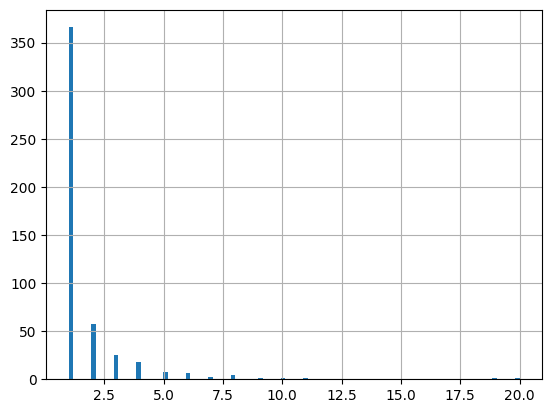

In [27]:
swissprot_CLEAN_withcluster[swissprot_CLEAN_withcluster['brenda'] == '4.2.1.20']['cluster90'].value_counts().hist(bins=100)

In [104]:
#save df as fasta
def save_fasta(df, filename):
    with open(filename, 'w') as f:
        for i, row in df.iterrows():
            f.write('>' + row['id'] + '\n')
            f.write(row['sequence'] + '\n')

save_fasta(swissprot_CLEAN, '/disk1/jyang4/repos/ProteinDT_submission/data/PECT/CLEANsplit100.fasta')

In [56]:
swissprot_CLEAN['sequence'].nunique()

134149

In [65]:
swissprot_CLEAN['brenda'].nunique()

3668

In [3]:
# swissprot = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/SwissProtEnzymeCLAP/processed_data/swissprot_unique_240408.csv')
# swissprot

### More old stuff

In [21]:
testB = trembl[~trembl['sequence'].isin(swissprot_CLEAN['sequence'])]

np.random.seed(42)
random.seed(42)
#sample one enzyme per EC
#sample one reaction per enzyme
testB = testB.groupby('brenda', as_index=False).apply(lambda x: x.sample(1))
#map brenda to reaciton by sample randomly by using ec2rxns_train dictionary 
testB = testB[testB['brenda'].isin(ec2rxns_train.keys())]
testB['reaction_smiles'] = testB['brenda'].map(ec2rxns_train)
#random sample a value from reaction_smiles
np.random.seed(42)
random.seed(42)
testB['reaction_smiles'] = testB['reaction_smiles'].apply(lambda x: random.choice(x))
testB

Unnamed: 0          id  \
2    3128026      3978927  A0A0R2F886   
3    15021973     5929852  A0A7J8G6U3   
4    10049195     4004453  A0A1H1SFS6   
5    1122803      6481343  A0A661V5U6   
6    14076215     2544725  A0A7W2STK1   
...                   ...         ...   
1809 4315423      3336392  A0A420XI78   
1812 2193675      8023919  A0A972N6W5   
1813 5336085      2917973  A0A2N3KEU2   
1815 7924146      1431818  A0A7L4NXD3   
1816 666269       7281160  A0A812G2E9   

                                                            name  \
2    3128026                               Alcohol dehydrogenase   
3    15021973                               L-xylulose reductase   
4    10049195         3-oxoacyl-[acyl-carrier-protein] reductase   
5    1122803                      3-dehydrosphinganine reductase   
6    14076215                        L-threonine 3-dehydrogenase   
...                                                          ...   
1809 4315423   Ribose/galactose/methyl galactoside import ATP...   
1812 2193675   Spermidine/putrescine import ATP-binding prote...   
1813 5336085       Autoinducer 2 import ATP-binding protein LsrA   
1815 7924146          ATP-binding cassette sub-family B member 6   
1816 666269          Vitamin B12 import ATP-binding protein BtuD   

                                                        sequence  \
2    3128026   MKAAVVRENLDGFVDLIDDWEPRALGFGEALVDVEYSGLCHTDLHV...   
3    15021973  MELRLAGLRALVTGAGKGIGRSTVKALHAAGVQVVSVSRTQSDLDS...   
4    10049195  MSLQGKVALVTGATRGIGQAIALELGRQGAIVIGTATSAAGAERIA...   
5    1122803   MNFRDRHVIVTGGSSGIGRATARLLTRRGAHVSVVARRQELLDETL...   
6    14076215  MKSLAKLKSEPGIWMTDSPIPEVGHNDLLIKIKKTAICGTDIHIYN...   
...                                                          ...   
1809 4315423   MTEQTMQDGQVLLTMTDVSKSFPGVKALDHANLTVKSHSVHALMGE...   
1812 2193675   MTYAVELIDVVKEFPPGEKGKAKGVVAVDHVTLRIRDGEFFSLLGP...   
1813 5336085   MERKNQDAAAVRVNDIWKSYGGTAVLKGVDITLLPGQVHALLGGNG...   
1815 7924146   QVQFSLWLLRYICTFMLFILGMKAPGLPHKPYMLLVNEEERDVENS...   
1816 666269    MMHVKHIAVGSRLLPLSFECKPGEVVHVVGPNGSGKSTLLGAISGT...   

                                                           value     brenda  \
2    3128026   Weissella confusa|reaction:a primary alcohol +...    1.1.1.1   
3    15021973  Rousettus aegyptiacus|function:Catalyzes the N...   1.1.1.10   
4    10049195  Pseudomonas oryzae|function:Catalyzes the NADP...  1.1.1.100   
5    1122803   Chloroflexota bacterium|reaction:NADP(+) + sph...  1.1.1.102   
6    14076215  Colwellia sp. MB02u-10|function:Catalyzes the ...  1.1.1.103   
...                                                          ...        ...   
1809 4315423   Otariodibacter oris|function:Part of an ABC tr...   7.5.2.11   
1812 2193675   Chloroflexota bacterium|function:Part of the A...   7.6.2.11   
1813 5336085   Thalassospira marina|function:Part of the ABC ...   7.6.2.13   
1815 7924146   Ceyx cyanopectus|reaction:ATP + H2O + heme b(i...    7.6.2.5   
1816 666269    Vibrio sp. B1ASS3|function:Part of the ABC tra...    7.6.2.8   

              dataset                                    reaction_smiles  
2    3128026   trembl  CC(O)c1ccc(Cl)cc1.NC(=O)c1ccc[n+]([C@@H]2O[C@H...  
3    15021973  trembl  NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...  
4    10049195  trembl  CCCCCCCCCCCCCCCCCCCCCC(=O)CC(=O)SCCN=C([O-])CC...  
5    1122803   trembl  *CCCCCCCCCCCCCCCC(=O)[C@@H]([NH3+])CO.NC(=O)C1...  
6    14076215  trembl  NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...  
...               ...                                                ...  
1809 4315423   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1812 2193675   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1813 5336085   trembl  C[C@@]1(O)OC[C@H](O)C1(O)O.Nc1ncnc2c1ncn2[C@@H...  
1815 7924146   trembl  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe]35n6c(c(C)c(...  
1816 666269    trembl  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...  

[1591 rows x 8 columns]

In [26]:
testB.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/test_sets/testB_1591.csv', index=False)

In [32]:
testC = testA[testA['brenda'].isin(ec2rxns_test.keys())]
testC['reaction_smiles'] = testC['brenda'].map(ec2rxns_test)
# np.random.seed(42)
# random.seed(42)
# testD['reaction_smiles'] = testD['reaction_smiles'].apply(lambda x: random.choice(x)) #should choose the same thing every time
testC

/tmp/ipykernel_3388116/3647667207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testC['reaction_smiles'] = testC['brenda'].map(ec2rxns_test)


id     brenda  \
0    44133   P22245    1.1.1.1   
1    63883   G0RH19   1.1.1.10   
2    33067   Q89AG9  1.1.1.100   
3    40314   Q09851  1.1.1.101   
4    125422  Q6GV12  1.1.1.102   
...             ...        ...   
3657 84827   Q6BEX0    7.5.2.9   
3658 84791   Q89WG0   7.6.2.10   
3664 128098  Q9C8T1    7.6.2.5   
3666 20725   Q87Q38    7.6.2.8   
3667 49988   Q9RR46    7.6.2.9   

                                                      sequence  \
0    44133   MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
1    63883   MKNGAFPHDNAAVPNVERVLPLFSLKGRTAIVSGAGAGIGLAVAQA...   
2    33067   MKTTKKIAVITGANRGLGKGIAEELSNTNNITVIGTSTSQKGCKII...   
3    40314   MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...   
4    125422  MLLLAAAGLVAFVLLLYMVSPLISPKPLALPGAHVVVTGGSSGIGK...   
...                                                        ...   
3657 84827   MTTDQHQEILRTEGLSKFFPGVKALDNVDFSLRRGEIMALLGENGA...   
3658 84791   MANVTLRNVRKTYTGGFEAIKGVNVDVADGQFCVLVGPSGCGKSTL...   
3664 128098  MSIRRPQIPRLLLQNVSCMRNAQQILRHVNVSLHDGGALVLTGTNG...   
3666 20725   MMRVKHIAVGSRLLPLSFECKDGEVVHVVGPNGSGKSTLLAAISGT...   
3667 49988   MSKIKVEELTKIFGKKASKASSLLSQGKSKTDILKETGATIGVNKA...   

                                                          name  \
0    44133                               Alcohol dehydrogenase   
1    63883                                L-xylulose reductase   
2    33067     3-oxoacyl-[acyl-carrier-protein] reductase FabG   
3    40314   NADPH-dependent 1-acyldihydroxyacetone phospha...   
4    125422                 3-ketodihydrosphingosine reductase   
...                                                        ...   
3657 84827   Galactofuranose transporter ATP-binding protei...   
3658 84791   sn-glycerol-3-phosphate import ATP-binding pro...   
3664 128098                  ABC transporter I family member 1   
3666 20725         Vitamin B12 import ATP-binding protein BtuD   
3667 49988   Glycine betaine/carnitine transport ATP-bindin...   

                                               reaction_smiles  
0    44133   CCOC(=O)CC(=O)c1ccccc1.NC(=O)C1=CN([C@@H]2O[C@...  
1    63883   NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...  
2    33067   *N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...  
3    40314   *OC[C@@H](O)COP(=O)([O-])[O-].NC(=O)c1ccc[n+](...  
4    125422  CCCCCCCCCCCCCCC[C@@H](O)[C@@H](N)CO.NC(=O)C1=C...  
...                                                        ...  
3657 84827   Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
3658 84791   *OP(=O)([O-])OC[C@H](O)CO.Nc1ncnc2c1ncn2[C@@H]...  
3664 128098  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...  
3666 20725   CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...  
3667 49988   C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...  

[2964 rows x 5 columns]

In [ ]:
testC.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/test_sets/testC_2964.csv', index=False)

In [31]:
testD = testB[testB['brenda'].isin(ec2rxns_test.keys())]
testD['reaction_smiles'] = testD['brenda'].map(ec2rxns_test)
# np.random.seed(42)
# random.seed(42)
# testD['reaction_smiles'] = testD['reaction_smiles'].apply(lambda x: random.choice(x)) #should choose the same thing every time
testD

/tmp/ipykernel_3388116/953053598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testD['reaction_smiles'] = testD['brenda'].map(ec2rxns_test)


Unnamed: 0          id  \
2    3128026      3978927  A0A0R2F886   
3    15021973     5929852  A0A7J8G6U3   
4    10049195     4004453  A0A1H1SFS6   
5    1122803      6481343  A0A661V5U6   
6    14076215     2544725  A0A7W2STK1   
...                   ...         ...   
1803 8368809      3468565  A0A081RZ04   
1807 5124319      2981165  A0A2T4N8B3   
1809 4315423      3336392  A0A420XI78   
1815 7924146      1431818  A0A7L4NXD3   
1816 666269       7281160  A0A812G2E9   

                                                            name  \
2    3128026                               Alcohol dehydrogenase   
3    15021973                               L-xylulose reductase   
4    10049195         3-oxoacyl-[acyl-carrier-protein] reductase   
5    1122803                      3-dehydrosphinganine reductase   
6    14076215                        L-threonine 3-dehydrogenase   
...                                                          ...   
1803 8368809         Arginine transport ATP-binding protein ArtP   
1807 5124319                      Type 3 secretion system ATPase   
1809 4315423   Ribose/galactose/methyl galactoside import ATP...   
1815 7924146          ATP-binding cassette sub-family B member 6   
1816 666269          Vitamin B12 import ATP-binding protein BtuD   

                                                        sequence  \
2    3128026   MKAAVVRENLDGFVDLIDDWEPRALGFGEALVDVEYSGLCHTDLHV...   
3    15021973  MELRLAGLRALVTGAGKGIGRSTVKALHAAGVQVVSVSRTQSDLDS...   
4    10049195  MSLQGKVALVTGATRGIGQAIALELGRQGAIVIGTATSAAGAERIA...   
5    1122803   MNFRDRHVIVTGGSSGIGRATARLLTRRGAHVSVVARRQELLDETL...   
6    14076215  MKSLAKLKSEPGIWMTDSPIPEVGHNDLLIKIKKTAICGTDIHIYN...   
...                                                          ...   
1803 8368809   MSIQLKSIDCYYGAHQALFDINLKCSSGETMVLLGPSGAGKSTLLR...   
1807 5124319   MTLSLDHIPDQLRHAIDECRLIQIRGRVTQVTGTLLKAVVPGVRIG...   
1809 4315423   MTEQTMQDGQVLLTMTDVSKSFPGVKALDHANLTVKSHSVHALMGE...   
1815 7924146   QVQFSLWLLRYICTFMLFILGMKAPGLPHKPYMLLVNEEERDVENS...   
1816 666269    MMHVKHIAVGSRLLPLSFECKPGEVVHVVGPNGSGKSTLLGAISGT...   

                                                           value     brenda  \
2    3128026   Weissella confusa|reaction:a primary alcohol +...    1.1.1.1   
3    15021973  Rousettus aegyptiacus|function:Catalyzes the N...   1.1.1.10   
4    10049195  Pseudomonas oryzae|function:Catalyzes the NADP...  1.1.1.100   
5    1122803   Chloroflexota bacterium|reaction:NADP(+) + sph...  1.1.1.102   
6    14076215  Colwellia sp. MB02u-10|function:Catalyzes the ...  1.1.1.103   
...                                                          ...        ...   
1803 8368809   Photorhabdus temperata subsp. temperata Meg1|r...    7.4.2.1   
1807 5124319   Aeromonas veronii|reaction:ATP + H2O + cellula...    7.4.2.8   
1809 4315423   Otariodibacter oris|function:Part of an ABC tr...   7.5.2.11   
1815 7924146   Ceyx cyanopectus|reaction:ATP + H2O + heme b(i...    7.6.2.5   
1816 666269    Vibrio sp. B1ASS3|function:Part of the ABC tra...    7.6.2.8   

              dataset                                    reaction_smiles  
2    3128026   trembl  CCOC(=O)CC(=O)c1ccccc1.NC(=O)C1=CN([C@@H]2O[C@...  
3    15021973  trembl  NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)([O-])OP(=O)(...  
4    10049195  trembl  *N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...  
5    1122803   trembl  CCCCCCCCCCCCCCC[C@@H](O)[C@@H](N)CO.NC(=O)C1=C...  
6    14076215  trembl  CC(=O)C(C)O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(...  
...               ...                                                ...  
1803 8368809   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1807 5124319   trembl  *N[C@@H](*)C(=O)N[C@@H](*)C(=O)O*.Nc1ncnc2c1nc...  
1809 4315423   trembl  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...  
1815 7924146   trembl  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...  
1816 666269    trembl  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...  

[1400 rows x 8 columns]

In [27]:
testD.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/test_sets/testD_1400.csv', index=False)

### reaction set which has each reaction associated to a random protein

In [12]:
all_reactions = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/testA_3668.csv')
all_reactions_train = all_reactions.copy()
all_reactions_train['reaction_smiles'] = all_reactions_train['brenda'].map(ec2rxns_train)
#explode the list of reaction_smiles
all_reactions_train = all_reactions_train.explode('reaction_smiles')
all_reactions_train['split'] = 'train'

all_reactions_test = all_reactions.copy()
all_reactions_test['reaction_smiles'] = all_reactions_test['brenda'].map(ec2rxns_test)
#explode the list of reaction_smiles
all_reactions_test = all_reactions_test.explode('reaction_smiles')
all_reactions_test['split'] = 'test'

all_reactions = pd.concat([all_reactions_train, all_reactions_test])
all_reactions.dropna(subset=['reaction_smiles'], inplace=True)
all_reactions

id    brenda                                           sequence  \
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
0     P22245   1.1.1.1  MVIANSNIIFVAGLGGIGLDTSREIVKSGPKNLVVLDRVDNPAAIA...   
...      ...       ...                                                ...   
3657  Q6BEX0   7.5.2.9  MTTDQHQEILRTEGLSKFFPGVKALDNVDFSLRRGEIMALLGENGA...   
3658  Q89WG0  7.6.2.10  MANVTLRNVRKTYTGGFEAIKGVNVDVADGQFCVLVGPSGCGKSTL...   
3664  Q9C8T1   7.6.2.5  MSIRRPQIPRLLLQNVSCMRNAQQILRHVNVSLHDGGALVLTGTNG...   
3666  Q87Q38   7.6.2.8  MMRVKHIAVGSRLLPLSFECKDGEVVHVVGPNGSGKSTLLAAISGT...   
3667  Q9RR46   7.6.2.9  MSKIKVEELTKIFGKKASKASSLLSQGKSKTDILKETGATIGVNKA...   

                                                   name  \
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
0                                 Alcohol dehydrogenase   
...                                                 ...   
3657  Galactofuranose transporter ATP-binding protei...   
3658  sn-glycerol-3-phosphate import ATP-binding pro...   
3664                  ABC transporter I family member 1   
3666        Vitamin B12 import ATP-binding protein BtuD   
3667  Glycine betaine/carnitine transport ATP-bindin...   

                                        reaction_smiles  split  
0     CCCCC[C@@H](C)O.NC(=O)c1ccc[n+]([C@@H]2O[C@H](...  train  
0     CCCCCCC(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)...  train  
0     CC(=O)CC(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O...  train  
0     CC(=O)C(C)=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)...  train  
0     CC(O)c1ccccc1.NC(=O)c1ccc[n+]([C@@H]2O[C@H](CO...  train  
...                                                 ...    ...  
3657  Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...   test  
3658  *OP(=O)([O-])OC[C@H](O)CO.Nc1ncnc2c1ncn2[C@@H]...   test  
3664  C=CC1=C(C)C2=Cc3c(C=C)c(C)c4n3[Fe-2]35n6c(c(C)...   test  
3666  CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...   test  
3667  C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...   test  

[46983 rows x 6 columns]

In [ ]:
all_reactions.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/all_reactions_46983.csv', index=False)

### All proteins set with has each protein associated to a random reaction

In [ ]:
df = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/all_proteins_CLEAN100.csv')
#add reaction_smiles as a filler
df['reaction_smiles'] = 'C'
df.to_csv('/disk1/jyang4/repos/ProteinDT_submission/data/PECT/test_sets/all_proteins_CLEAN100.csv', index=False)

### If you want to build the test set from our swissport and the CLEAN swissprot (not sure if makes sense)

Include EC numbers with dashes for now